In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [386]:
file_path = r"D:\Private\Python\myenv\SuperStore_Orders.csv"

df = pd.read_csv(file_path, encoding="latin1")

shape = df.shape
head = df.head()
info = df.dtypes

shape, head, info, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

((51290, 21),
           order_id  order_date   ship_date       ship_mode    customer_name  \
 0     AG-2011-2040  01-01-2011  06-01-2011  Standard Class  Toby Braunhardt   
 1    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
 2     HU-2011-1220  01-01-2011  05-01-2011    Second Class    Annie Thurman   
 3  IT-2011-3647632  01-01-2011  05-01-2011    Second Class     Eugene Moren   
 4    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
 
        segment            state    country  market   region  ...  \
 0     Consumer      Constantine    Algeria  Africa   Africa  ...   
 1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
 2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
 3  Home Office        Stockholm     Sweden      EU    North  ...   
 4     Consumer  New South Wales  Australia    APAC  Oceania  ...   
 
           category sub_category                 product_name sales quantity  \
 0  Offi

In [387]:
cols = list(df.columns)
for i, c in enumerate(cols, start=1):
    print(f"{i}. {c}")

cols


1. order_id
2. order_date
3. ship_date
4. ship_mode
5. customer_name
6. segment
7. state
8. country
9. market
10. region
11. product_id
12. category
13. sub_category
14. product_name
15. sales
16. quantity
17. discount
18. profit
19. shipping_cost
20. order_priority
21. year


['order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_name',
 'segment',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'order_priority',
 'year']

In [388]:

missing_values = df.isnull().sum()


duplicate_count = df.duplicated().sum()


numeric_check = df[['sales', 'quantity', 'discount', 'profit', 'shipping_cost']].dtypes



missing_values, duplicate_count, numeric_check


(order_id          0
 order_date        0
 ship_date         0
 ship_mode         0
 customer_name     0
 segment           0
 state             0
 country           0
 market            0
 region            0
 product_id        0
 category          0
 sub_category      0
 product_name      0
 sales             0
 quantity          0
 discount          0
 profit            0
 shipping_cost     0
 order_priority    0
 year              0
 dtype: int64,
 np.int64(0),
 sales             object
 quantity           int64
 discount         float64
 profit           float64
 shipping_cost    float64
 dtype: object)

In [389]:
df['sales'] = df['sales'].str.replace(',', '.', regex=False)

df["sales"] = df["sales"].astype(float)  

In [390]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  float64
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

(              sales      quantity      discount        profit  shipping_cost  \
 count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000   
 mean     152.855055      3.476545      0.142908     28.641740      26.375915   
 std      198.991200      2.278766      0.212280    174.424113      57.296804   
 min        0.000000      1.000000      0.000000  -6599.978000       0.000000   
 25%       24.000000      2.000000      0.000000      0.000000       2.610000   
 50%       68.000000      3.000000      0.000000      9.240000       7.790000   
 75%      196.000000      5.000000      0.200000     36.810000      24.450000   
 max      999.000000     14.000000      0.850000   8399.976000     933.570000   
 
                year  
 count  51290.000000  
 mean    2012.777208  
 std        1.098931  
 min     2011.000000  
 25%     2012.000000  
 50%     2013.000000  
 75%     2014.000000  
 max     2014.000000  ,
 None)

In [391]:
#profit percentage by region
df_region = (
    df.groupby("region", dropna=False)
      .agg(total_sales=("sales", "sum"),
           total_profit=("profit", "sum"))
      .reset_index()
)

df_region["profit_pct"] = np.where(
    df_region["total_sales"] != 0,
    100.0 * df_region["total_profit"] / df_region["total_sales"],
    np.nan
)

In [392]:
df_region = df_region.sort_values("profit_pct", ascending=False)

print("Ringkasan per region:")
print(df_region.to_string(index=False))

Ringkasan per region:
        region  total_sales  total_profit  profit_pct
    North Asia   454080.663  165578.42100   36.464539
        Canada    50330.618   17817.39000   35.400698
  Central Asia   389869.333  132480.18700   33.980664
          West   424474.341  108418.44890   25.541815
          East   366804.342   91522.78000   24.951389
         North   791003.646  194597.95252   24.601398
       Oceania   625856.825  121666.64200   19.440012
       Central  1807653.761  311403.98164   17.226971
        Africa   538360.661   88871.63100   16.507824
     Caribbean   251513.840   34571.32104   13.745296
         South  1031670.859  140355.76618   13.604704
          EMEA   575792.622   43897.97100    7.623920
Southeast Asia   532524.266   17852.32900    3.352397


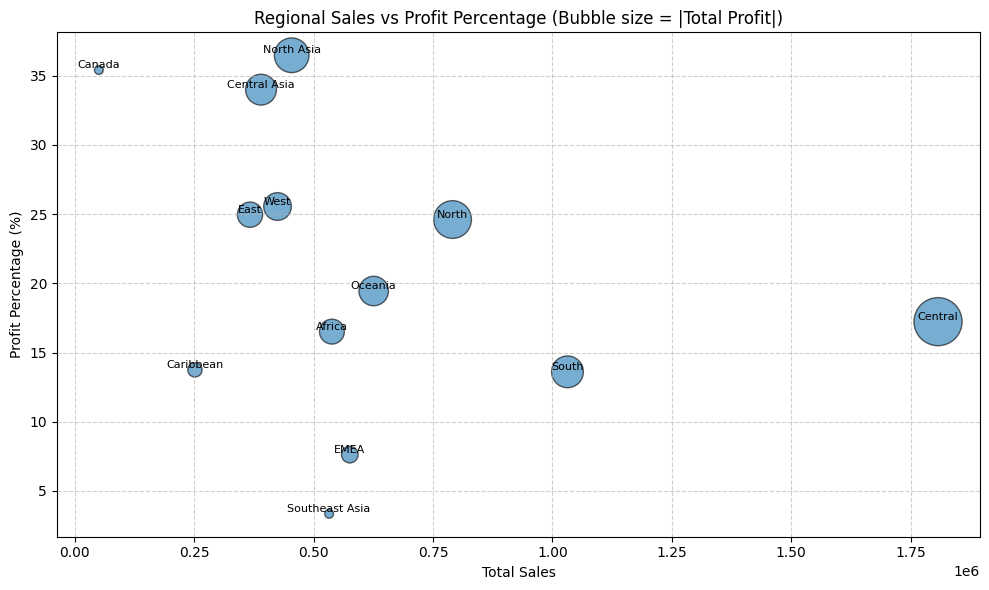

In [393]:

min_dot, max_dot = 40, 1200  
p = df_region["total_profit"].abs()
sizes = min_dot + (max_dot - min_dot) * (p - p.min()) / (p.max() - p.min() + 1e-9)


plt.figure(figsize=(10, 6))
plt.scatter(df_region["total_sales"], df_region["profit_pct"],
            s=sizes, alpha=0.6, edgecolors="black")  

for _, row in df_region.iterrows():
    plt.text(row["total_sales"], row["profit_pct"], str(row["region"]),
             fontsize=8, ha="center", va="bottom")

plt.title("Regional Sales vs Profit Percentage (Bubble size = |Total Profit|)")
plt.xlabel("Total Sales")
plt.ylabel("Profit Percentage (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [394]:
region_qty_country = (
    df.groupby("region", dropna=False)
      .agg(
          total_quantity=("quantity", "sum"),
          n_countries=("country", "nunique")  
      )
      .reset_index()
      .sort_values(["total_quantity", "n_countries"], ascending=[False, False])
)

print("Ringkasan quantity & negara per region:")
print(region_qty_country.to_string(index=False))

Ringkasan quantity & negara per region:
        region  total_quantity  n_countries
       Central           41762           12
         South           25206           14
         North           18021            7
       Oceania           12838            3
          West           12266            1
Southeast Asia           11822            8
          EMEA           11517           40
          East           10618            1
        Africa           10564           45
    North Asia            8851            6
  Central Asia            7715            6
     Caribbean            6299            8
        Canada             833            1


In [395]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,152.855055,3.476545,0.142908,28.641740,26.375915,2012.777208
std,198.991200,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,24.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,68.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,196.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [396]:

df_south = df[df["region"].astype(str).str.strip().str.casefold() == "south"].copy()

print("Shape df_south:", df_south.shape)
print("\n5 baris teratas:")
print(df_south.head())


print("\n=== df_south.info() ===")
df_south.info()

Shape df_south: (6645, 21)

5 baris teratas:
          order_id  order_date   ship_date       ship_mode      customer_name  \
27  MX-2011-111255  04-01-2011  09-01-2011    Second Class  Russell Applegate   
31  MX-2011-111255  04-01-2011  09-01-2011    Second Class  Russell Applegate   
33  US-2011-136007  04-01-2011  11-01-2011  Standard Class      Beth Thompson   
58  CA-2011-167199  07-01-2011  11-01-2011  Standard Class      Maria Etezadi   
59  CA-2011-167199  07-01-2011  11-01-2011  Standard Class      Maria Etezadi   

        segment     state        country market region  ...         category  \
27     Consumer    Parana         Brazil  LATAM  South  ...        Furniture   
31     Consumer    Parana         Brazil  LATAM  South  ...  Office Supplies   
33  Home Office   Alagoas         Brazil  LATAM  South  ...  Office Supplies   
58  Home Office  Kentucky  United States     US  South  ...        Furniture   
59  Home Office  Kentucky  United States     US  South  ...  Office 

South — Total Sales & Total Profit per Category           category  total_sales  total_profit
0        Furniture   325582.347   22651.62810
1  Office Supplies   365871.486   67495.99880
2       Technology   340217.026   50208.13928


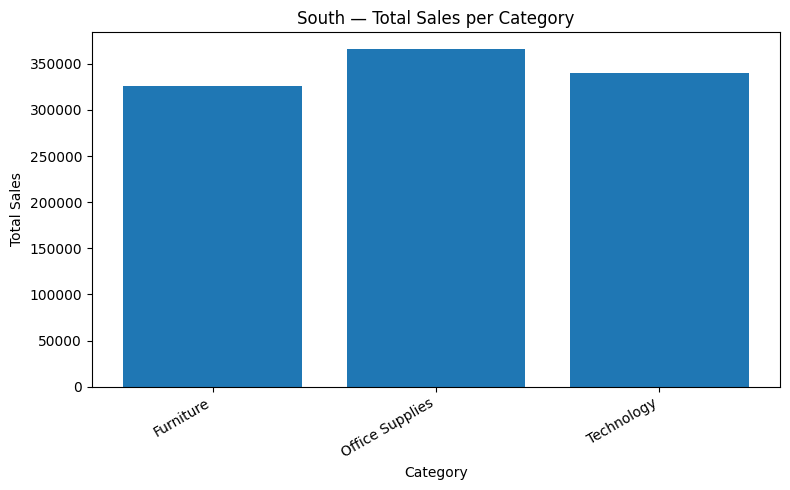

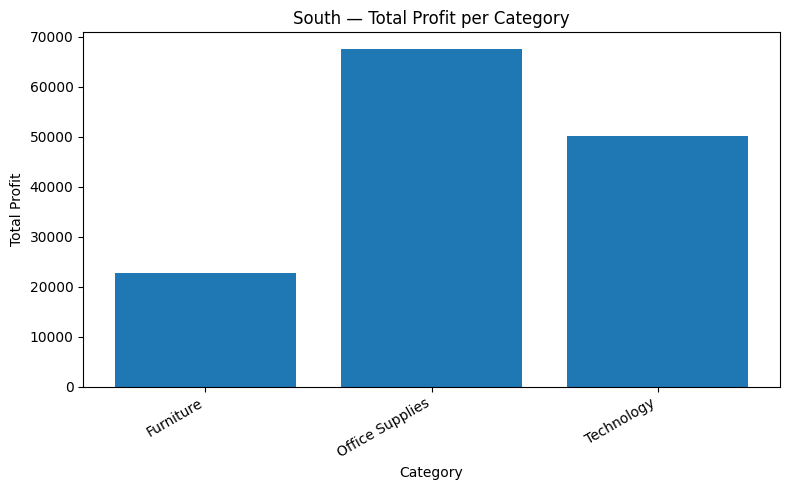

Grafik total sales & total profit per category (South) telah ditampilkan.


In [397]:
agg_cat = (
    df_south.groupby("category", dropna=False)
            .agg(total_sales=("sales", "sum"),
                 total_profit=("profit", "sum"))
            .reset_index()
)


print("South — Total Sales & Total Profit per Category", agg_cat)


cats = agg_cat["category"].astype(str).tolist()
sales_vals = agg_cat["total_sales"].values

plt.figure(figsize=(8, 5))
plt.bar(cats, sales_vals)
plt.title("South — Total Sales per Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


profit_vals = agg_cat["total_profit"].values

plt.figure(figsize=(8, 5))
plt.bar(cats, profit_vals)
plt.title("South — Total Profit per Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

print("Grafik total sales & total profit per category (South) telah ditampilkan.")

In [398]:

agg_sub = (
    df_south.groupby("sub_category", dropna=False)
            .agg(
                total_sales=("sales", "sum"),
                total_profit=("profit", "sum"),
                total_quantity=("quantity", "sum"),
                order_count=("order_id", "nunique")
            )
            .reset_index()
)

agg_sub["profit_pct"] = np.where(
    agg_sub["total_sales"] != 0,
    100.0 * agg_sub["total_profit"] / agg_sub["total_sales"],
    np.nan
)

agg_sorted = agg_sub.sort_values("total_profit", ascending=False).reset_index(drop=True)

top5 = agg_sorted.head(5).copy()
bottom5 = agg_sorted.tail(5).copy()

tot_profit = agg_sorted["total_profit"].sum()
top3 = agg_sorted.head(3)
share_top3 = (top3["total_profit"].sum() / tot_profit * 100.0) if tot_profit != 0 else np.nan



In [399]:

print(agg_sorted)

   sub_category  total_sales  total_profit  total_quantity  order_count  \
0     Bookcases   106001.623   28962.30280            1209          316   
1    Appliances    48824.600   28718.96260             877          233   
2       Copiers   112223.996   27700.84858            1074          294   
3   Accessories    71838.581   22701.46640            1520          376   
4   Furnishings    57826.217   11398.05790            1687          404   
5         Paper    36277.000    9549.52340            2009          466   
6        Chairs   112887.424    9303.58930            1684          402   
7           Art    49623.000    8962.24760            2297          542   
8       Binders    42466.966    8594.01000            2987          679   
9        Phones   117724.595    4606.96330            1668          407   
10    Envelopes    23649.000    4017.13900            1342          320   
11     Supplies    26835.830    3765.07130            1195          294   
12       Labels     9170.

=== South — Top 3 sub-categories by total profit ===
1. Bookcases: profit = 28,962.30 (profit% = 27.32%)
2. Appliances: profit = 28,718.96 (profit% = 58.82%)
3. Copiers: profit = 27,700.85 (profit% = 24.68%)

Top 3 share of South total profit: 60.83%


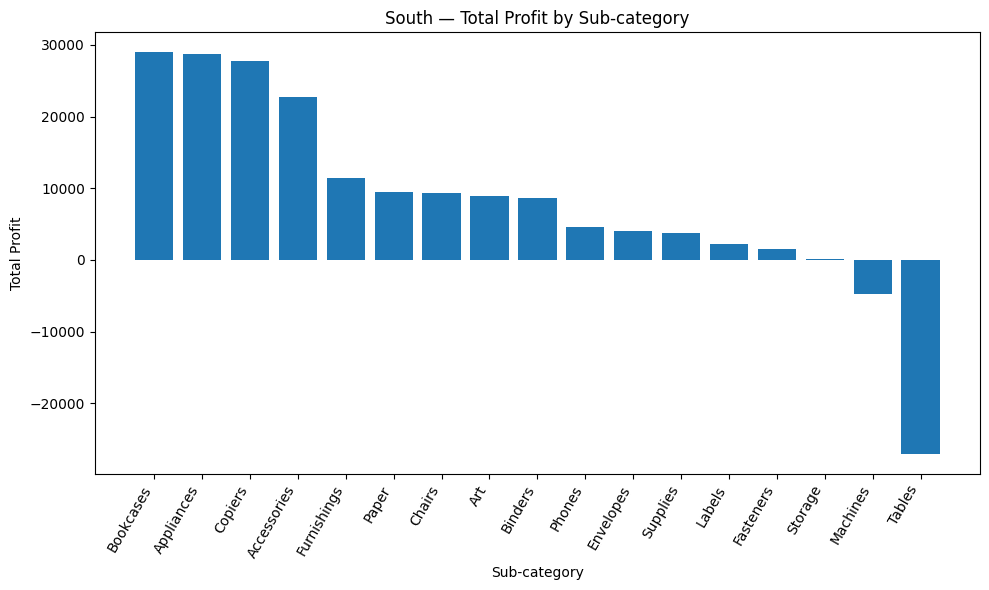

In [400]:
print("=== South — Top 3 sub-categories by total profit ===")
for i, row in top3.iterrows():
    print(f"{i+1}. {row['sub_category']}: profit = {row['total_profit']:,.2f} "
          f"(profit% = {row['profit_pct']:.2f}%)")
print(f"\nTop 3 share of South total profit: {share_top3:.2f}%")

plt.figure(figsize=(10, 6))
x = agg_sorted["sub_category"].astype(str).tolist()
y = agg_sorted["total_profit"].values
plt.bar(x, y)
plt.title("South — Total Profit by Sub-category")
plt.xlabel("Sub-category")
plt.ylabel("Total Profit")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

In [401]:

agg_cat_sub = (
    df_south.groupby(["category", "sub_category"], dropna=False)
            .agg(
                total_sales=("sales", "sum"),
                total_profit=("profit", "sum"),
                total_quantity=("quantity", "sum"),
                order_count=("order_id", "nunique")
            )
            .reset_index()
)

agg_cat_sub["cat_sub"] = agg_cat_sub["category"].astype(str) + "; " + agg_cat_sub["sub_category"].astype(str)

agg_sorted = agg_cat_sub.sort_values("total_profit", ascending=False).reset_index(drop=True)

In [402]:
print( agg_sorted[["cat_sub", "total_sales", "total_profit", "total_quantity", "order_count"]])


                        cat_sub  total_sales  total_profit  total_quantity  \
0          Furniture; Bookcases   106001.623   28962.30280            1209   
1   Office Supplies; Appliances    48824.600   28718.96260             877   
2           Technology; Copiers   112223.996   27700.84858            1074   
3       Technology; Accessories    71838.581   22701.46640            1520   
4        Furniture; Furnishings    57826.217   11398.05790            1687   
5        Office Supplies; Paper    36277.000    9549.52340            2009   
6             Furniture; Chairs   112887.424    9303.58930            1684   
7          Office Supplies; Art    49623.000    8962.24760            2297   
8      Office Supplies; Binders    42466.966    8594.01000            2987   
9            Technology; Phones   117724.595    4606.96330            1668   
10   Office Supplies; Envelopes    23649.000    4017.13900            1342   
11    Office Supplies; Supplies    26835.830    3765.07130      

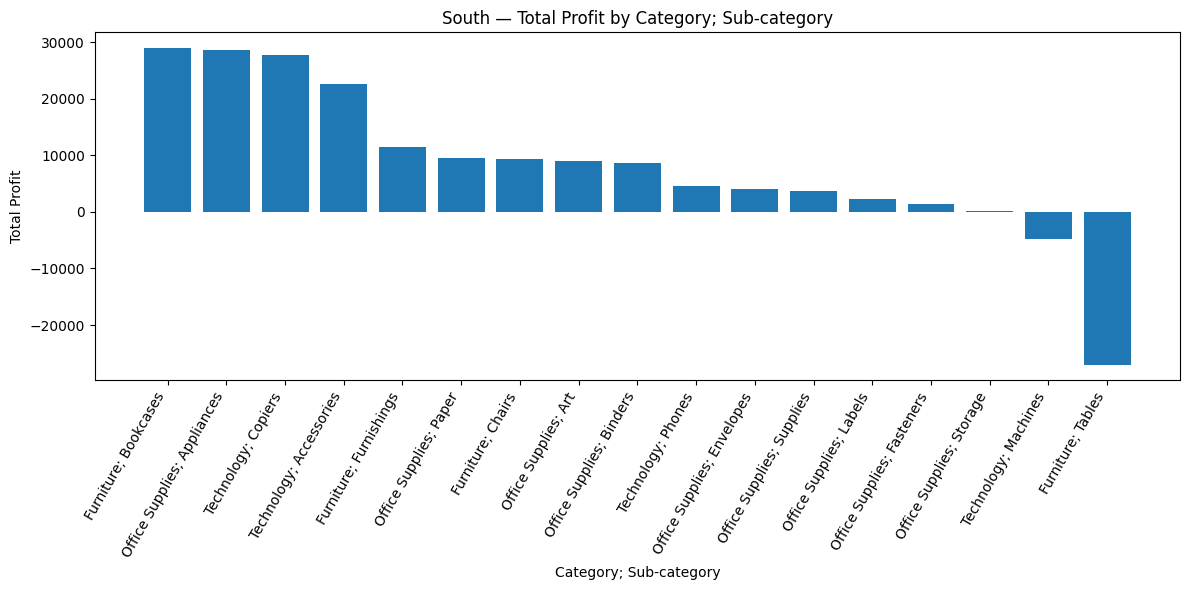

In [403]:
plt.figure(figsize=(12, 6))
x = agg_sorted["cat_sub"].tolist()
y = agg_sorted["total_profit"].values
plt.bar(x, y)
plt.title("South — Total Profit by Category; Sub-category")
plt.xlabel("Category; Sub-category")
plt.ylabel("Total Profit")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

In [404]:
agg_sub = (
    df_south.groupby("sub_category", dropna=False)
            .agg(total_profit=("profit", "sum"))
            .reset_index()
            .sort_values("total_profit", ascending=False)
)
top3_subs = agg_sub["sub_category"].head(3).tolist()

top3_df = df_south[df_south["sub_category"].isin(top3_subs)].copy()


disc_desc = top3_df.groupby("sub_category")["discount"].describe().round(4)

weighted_disc = (
    top3_df.groupby("sub_category")
           .apply(lambda g: np.average(g["discount"].dropna(), weights=(g["sales"].abs()+1e-12).reindex(g.index, fill_value=0)))
           .rename("sales_weighted_discount")
).to_frame()

def bucket_shares(g):
    n = len(g)
    if n == 0:
        return pd.Series({"share_disc_0": np.nan, "share_0to20": np.nan, "share_ge20": np.nan})
    d = g["discount"].fillna(0.0)
    return pd.Series({
        "share_disc_0": (d.eq(0).mean() * 100.0),
        "share_0to20": (d.gt(0).mul(d.lt(0.2)).mean() * 100.0),
        "share_ge20": (d.ge(0.2).mean() * 100.0)
    })

disc_shares = top3_df.groupby("sub_category").apply(bucket_shares)

disc_summary = disc_desc.join(weighted_disc).join(disc_shares)
print(disc_summary)



              count    mean     std  min  25%    50%    75%    max  \
sub_category                                                         
Appliances    238.0  0.1147  0.1814  0.0  0.0  0.000  0.200  0.600   
Bookcases     331.0  0.1254  0.2102  0.0  0.0  0.000  0.200  0.600   
Copiers       305.0  0.1114  0.2037  0.0  0.0  0.002  0.002  0.602   

              sales_weighted_discount  share_disc_0  share_0to20  share_ge20  
sub_category                                                                  
Appliances                   0.130665     65.126050     0.000000   34.873950  
Bookcases                    0.100690     71.299094     0.000000   28.700906  
Copiers                      0.087896     34.098361    41.967213   23.934426  


C:\Users\72526\AppData\Local\Temp\ipykernel_16976\3567887112.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g["discount"].dropna(), weights=(g["sales"].abs()+1e-12).reindex(g.index, fill_value=0)))
C:\Users\72526\AppData\Local\Temp\ipykernel_16976\3567887112.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  disc_shares = top3_df.groupby("sub_category").apply(bucket_shares)


   discount_rate  count
0            0.0    623
1            0.2     62
2            0.4    111
3            0.5     12
4            0.6     66


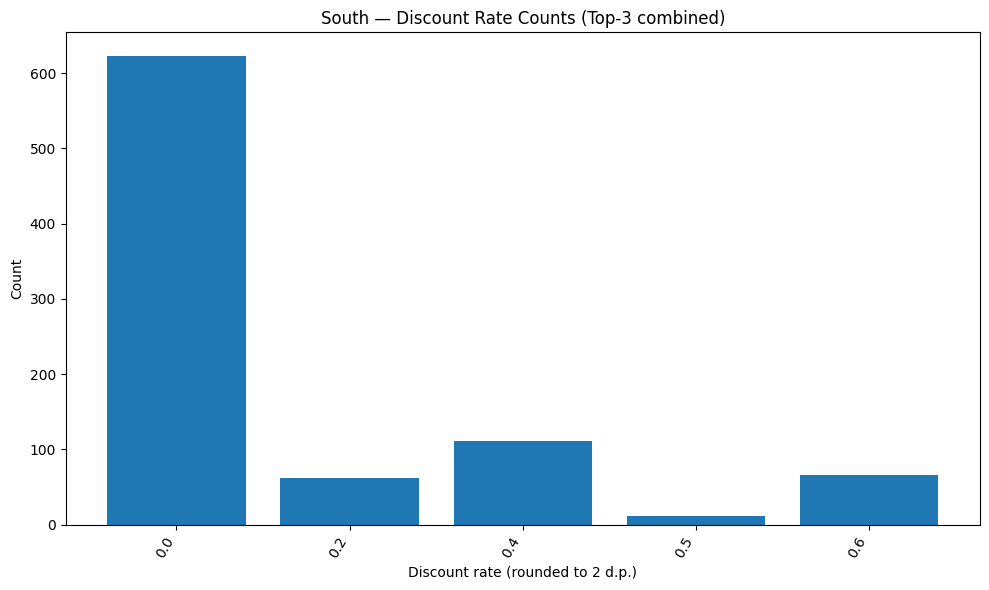

In [405]:
top3_df["discount_r"] = top3_df["discount"].round(2)
overall_counts = (
    top3_df["discount_r"].value_counts(dropna=False)
           .sort_index()
           .rename_axis("discount_rate")
           .to_frame("count")
           .reset_index()
)
print(overall_counts)

plt.figure(figsize=(10, 6))
plt.bar(overall_counts["discount_rate"].astype(str), overall_counts["count"].values)
plt.title("South — Discount Rate Counts (Top-3 combined)")
plt.xlabel("Discount rate (rounded to 2 d.p.)")
plt.ylabel("Count")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

sub_category  Appliances  Bookcases  Copiers
discount_r                                  
0.0                  155        236      232
0.2                   45         14        3
0.4                   20         48       43
0.5                    5          3        4
0.6                   13         30       23


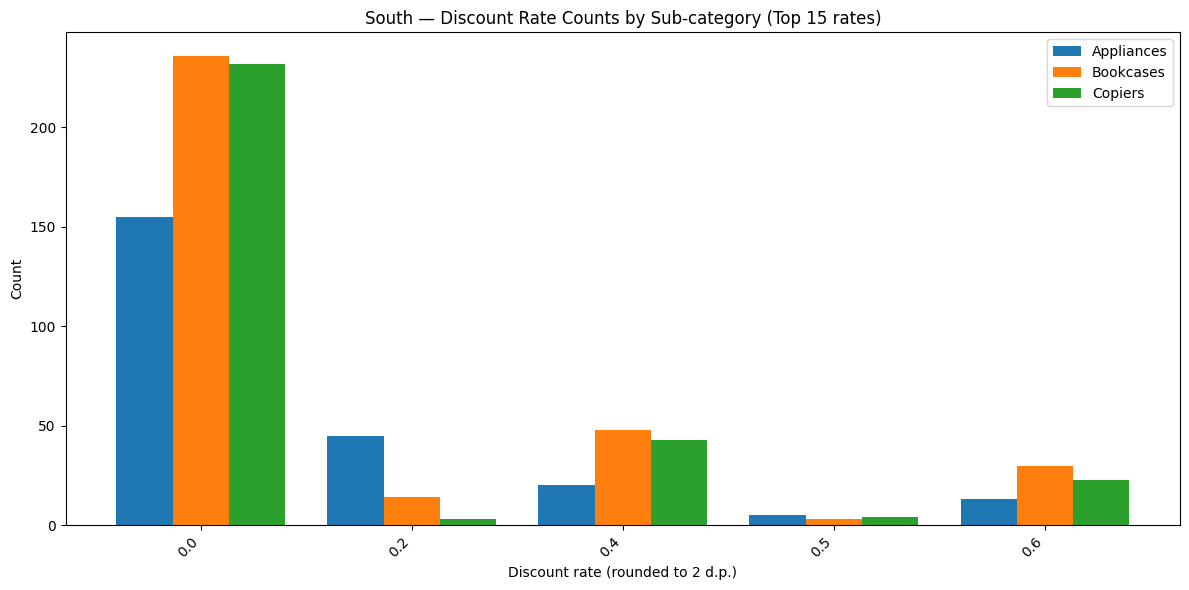

In [406]:
counts_mat = (
    top3_df.groupby(["sub_category", "discount_r"])
           .size()
           .unstack(0)
           .fillna(0)
           .astype(int)
           .sort_index()
)
print(counts_mat)

N = 15
topN_rates = (overall_counts.sort_values("count", ascending=False)
                            .head(N)["discount_rate"].tolist())
counts_topN = counts_mat.loc[counts_mat.index.intersection(topN_rates)]

x = np.arange(len(counts_topN.index))
width = 0.8 / max(1, counts_topN.shape[1])

plt.figure(figsize=(12, 6))
for i, sc in enumerate(counts_topN.columns):
    plt.bar(x + i*width, counts_topN[sc].values, width, label=str(sc))
plt.xticks(x + (counts_topN.shape[1]-1)*width/2,
           [str(v) for v in counts_topN.index], rotation=45, ha="right")
plt.title("South — Discount Rate Counts by Sub-category (Top 15 rates)")
plt.xlabel("Discount rate (rounded to 2 d.p.)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

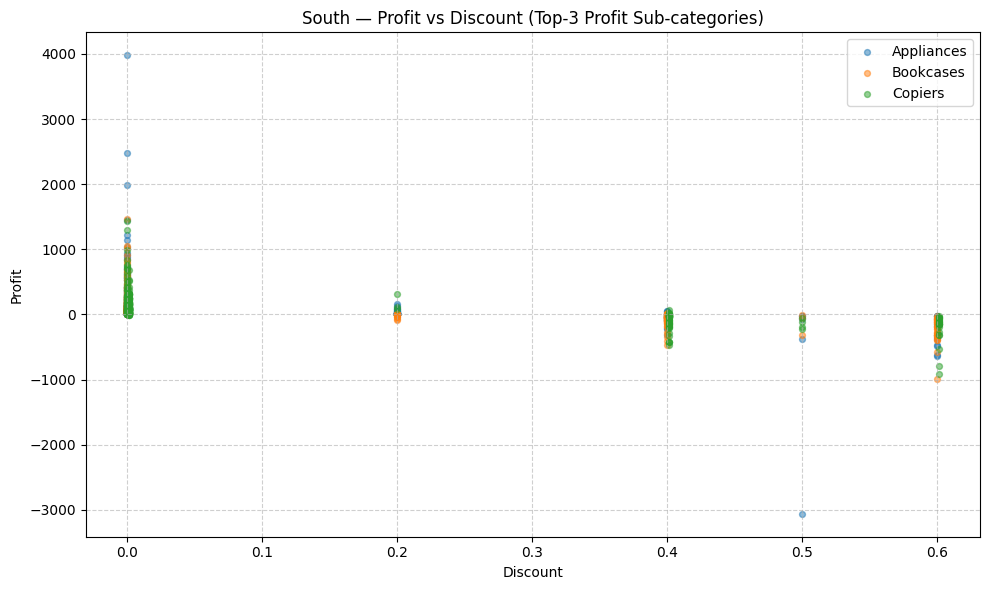

In [407]:

plt.figure(figsize=(10, 6))
for sc, g in top3_df.groupby("sub_category"):
    plt.scatter(g["discount"], g["profit"], s=18, alpha=0.5, label=str(sc))

plt.title("South — Profit vs Discount (Top-3 Profit Sub-categories)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [408]:
ship_counts = pd.crosstab(top3_df["sub_category"], top3_df["ship_mode"])
ship_pct = pd.crosstab(top3_df["sub_category"], top3_df["ship_mode"], normalize='index').mul(100).round(2)

print(ship_counts)
print(ship_pct)



ship_mode     First Class  Same Day  Second Class  Standard Class
sub_category                                                     
Appliances             45         8            51             134
Bookcases              50        18            71             192
Copiers                45        16            55             189
ship_mode     First Class  Same Day  Second Class  Standard Class
sub_category                                                     
Appliances          18.91      3.36         21.43           56.30
Bookcases           15.11      5.44         21.45           58.01
Copiers             14.75      5.25         18.03           61.97


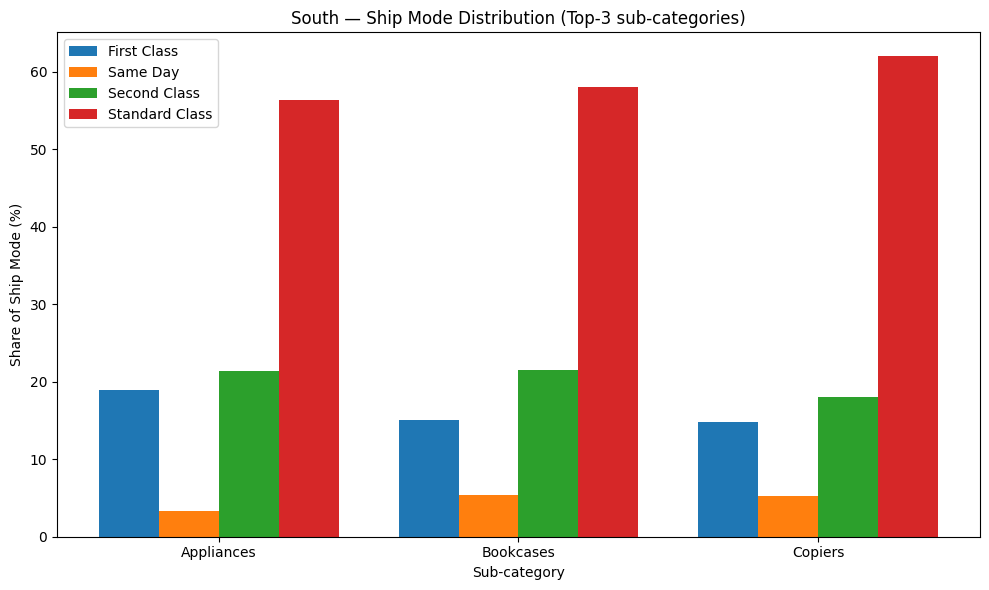

In [409]:

subs = list(ship_pct.index)
modes = list(ship_pct.columns)
x = np.arange(len(subs))
width = 0.8 / max(1, len(modes))

plt.figure(figsize=(10, 6))
for i, m in enumerate(modes):
    heights = ship_pct[m].values
    plt.bar(x + i*width, heights, width, label=str(m))
plt.xticks(x + (len(modes)-1)*width/2, subs, rotation=0)
plt.ylabel("Share of Ship Mode (%)")
plt.xlabel("Sub-category")
plt.title("South — Ship Mode Distribution (Top-3 sub-categories)")
plt.legend()
plt.tight_layout()
plt.show()


In [410]:
df_tables_south = df_south[df_south["sub_category"].astype(str).str.strip().str.casefold() == "tables"].copy()


In [411]:
summary = {
    "rows": [len(df_tables_south)],
    "order_count": [df_tables_south["order_id"].nunique() if "order_id" in df_tables_south.columns else np.nan],
    "total_sales": [df_tables_south["sales"].sum()],
    "total_profit": [df_tables_south["profit"].sum()],
    "profit_pct": [100.0 * df_tables_south["profit"].sum() / df_tables_south["sales"].sum() if df_tables_south["sales"].sum() != 0 else np.nan],
    "avg_discount": [df_tables_south["discount"].mean()],
    "median_discount": [df_tables_south["discount"].median()],
}
summary_df = pd.DataFrame(summary)
print(summary_df)

   rows  order_count  total_sales  total_profit  profit_pct  avg_discount  \
0   132          128    48867.083   -27012.3219  -55.277132      0.364015   

   median_discount  
0              0.4  


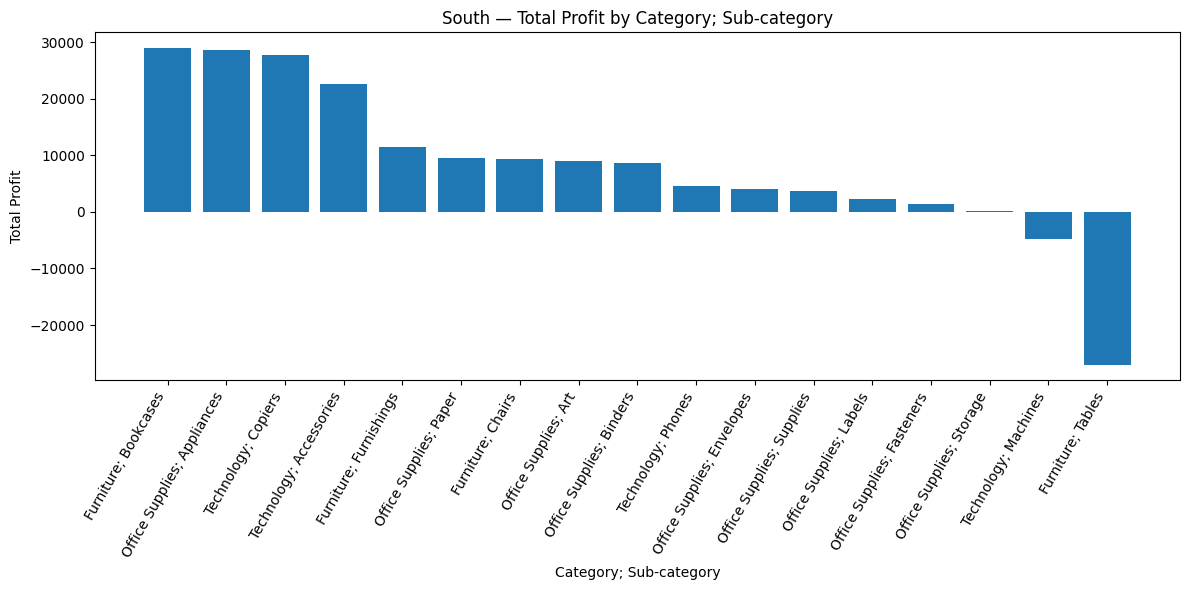

In [412]:
plt.figure(figsize=(12, 6))
x = agg_sorted["cat_sub"].tolist()
y = agg_sorted["total_profit"].values
plt.bar(x, y)
plt.title("South — Total Profit by Category; Sub-category")
plt.xlabel("Category; Sub-category")
plt.ylabel("Total Profit")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

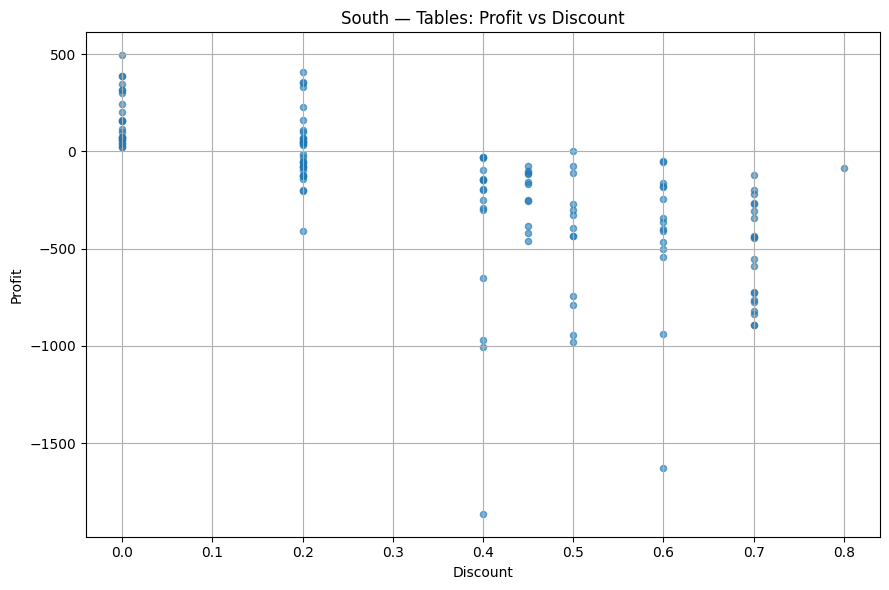

In [413]:

plt.figure(figsize=(9, 6))
plt.scatter(df_tables_south["discount"], df_tables_south["profit"], s=20, alpha=0.6)
plt.title("South — Tables: Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

South — Tables: yearly totals
 year  total_quantity  total_profit
 2011              96    -4917.8348
 2012              72    -4329.8775
 2013             167    -6807.2710
 2014             148   -10957.3386


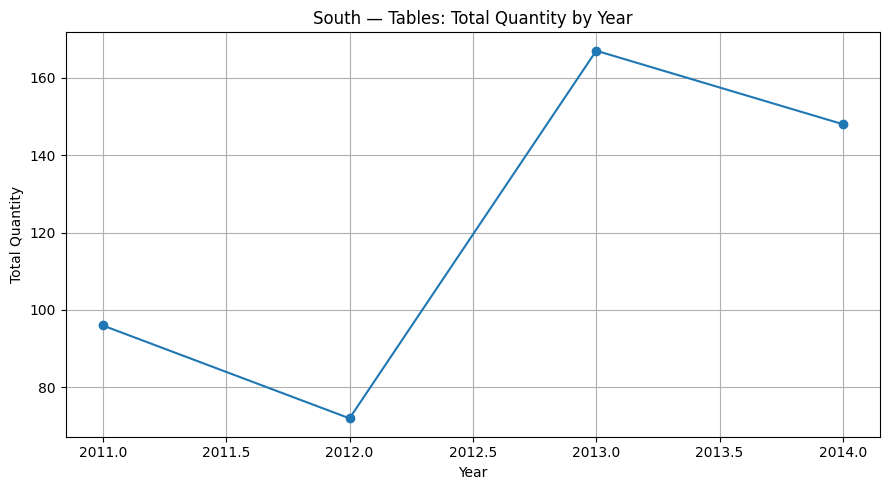

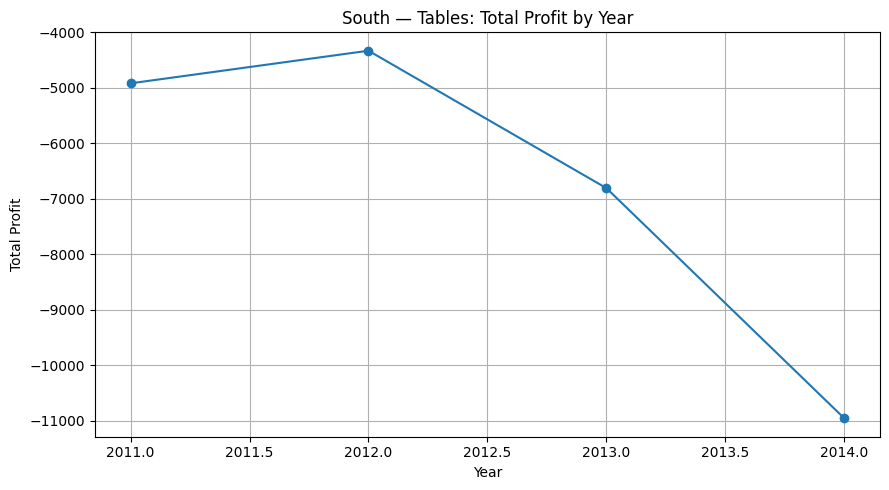

In [414]:
yearly = (
    df_tables_south.groupby("year", dropna=False)
                   .agg(total_quantity=("quantity", "sum"),
                        total_profit=("profit", "sum"))
                   .reset_index()
                   .sort_values("year")
)

print("South — Tables: yearly totals")
print(yearly.to_string(index=False))

plt.figure(figsize=(9, 5))
plt.plot(yearly["year"], yearly["total_quantity"], marker="o")
plt.title("South — Tables: Total Quantity by Year")
plt.xlabel("Year")
plt.ylabel("Total Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 5))
plt.plot(yearly["year"], yearly["total_profit"], marker="o")
plt.title("South — Tables: Total Profit by Year")
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

In [415]:

years = [2013, 2014]
data_by_year = {y: df_tables_south[df_tables_south["year"] == y] for y in years}


all_discounts = pd.concat([d["discount"] for d in data_by_year.values() if not d.empty], axis=0)
all_profits = pd.concat([d["profit"] for d in data_by_year.values() if not d.empty], axis=0)
if not all_discounts.empty and not all_profits.empty:
    x_min, x_max = float(np.nanmin(all_discounts)), float(np.nanmax(all_discounts))
    y_min, y_max = float(np.nanmin(all_profits)), float(np.nanmax(all_profits))
else:
    x_min = y_min = 0.0
    x_max = y_max = 1.0

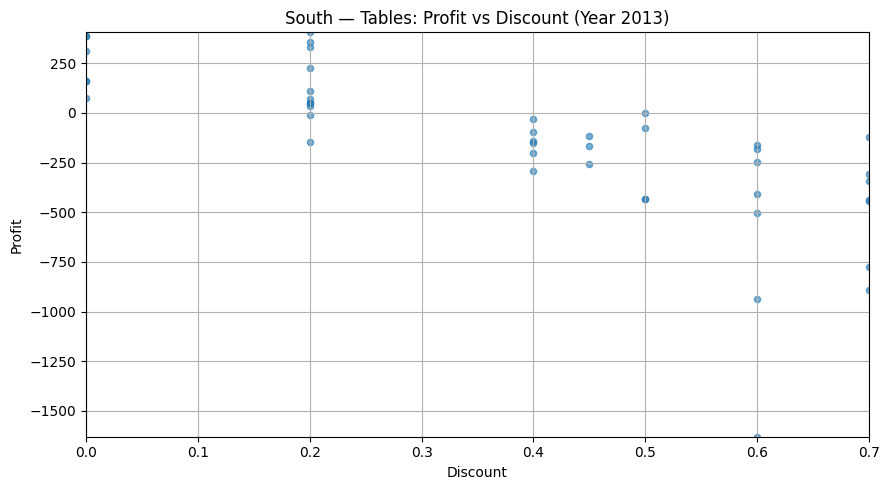

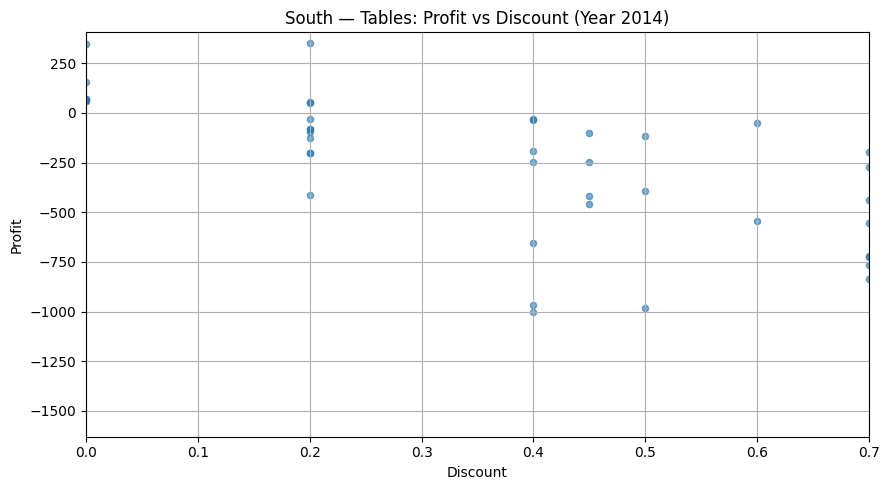

In [416]:

for y in years:
    d = data_by_year[y]
    plt.figure(figsize=(9, 5))
    if not d.empty:
        plt.scatter(d["discount"], d["profit"], s=20, alpha=0.6)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title(f"South — Tables: Profit vs Discount (Year {y})")
        plt.xlabel("Discount")
        plt.ylabel("Profit")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:

        plt.title(f"South — Tables: Profit vs Discount (Year {y}) — No data")
        plt.xlabel("Discount")
        plt.ylabel("Profit")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [417]:
print(df_tables_south["product_name"].head(10))

132             Bevis Training Table, with Bottom Storage
400               Hon Conference Table, Adjustable Height
401               Hon Conference Table, Adjustable Height
586               Hon 2111 Invitation Series Corner Table
695             Barricks Round Table, with Bottom Storage
1486         Barricks Training Table, with Bottom Storage
1513    SAFCO PlanMaster Boards, 60w x 37-1/2d, White ...
2770                      Bevis 44 x 96 Conference Tables
3159             Barricks Coffee Table, Adjustable Height
3289                           KI Adjustable-Height Table
Name: product_name, dtype: object


               table_group  total_quantity
0         Conference Table             197
1  Adjustable Height Table              48
2                   Others             238


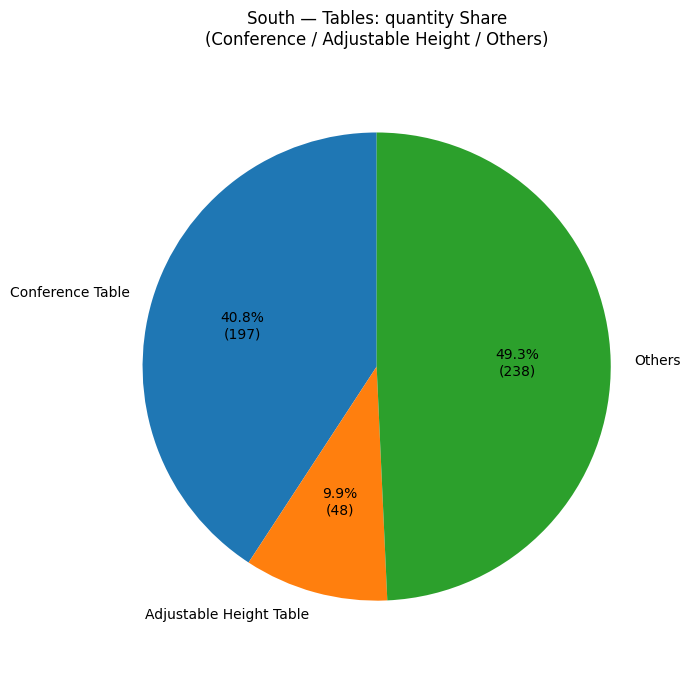

In [418]:
def classify_table(name: str) -> str:
    s = str(name).lower()
    if "conference table" in s:
        return "Conference Table"
    if "adjustable height table" in s or ("adjustable" in s and "height" in s and "table" in s):
        return "Adjustable Height Table"
    return "Others"

df_tables_south["table_group"] = df_tables_south["product_name"].map(classify_table)

metric_col = "quantity"  
grouped = (df_tables_south
           .groupby("table_group", dropna=False)[metric_col]
           .sum()
           .reindex(["Conference Table", "Adjustable Height Table", "Others"])
           .fillna(0.0)
           .reset_index()
           .rename(columns={metric_col: f"total_{metric_col}"}))

print(grouped)

vals = grouped[f"total_{metric_col}"].values
labels = grouped["table_group"].astype(str).values

total_sum = float(vals.sum()) if np.isfinite(vals.sum()) else 0.0
def autopct_fmt(pct):
    absolute = pct/100.0 * total_sum
    return f"{pct:.1f}%\n({absolute:,.0f})"

plt.figure(figsize=(7, 7))
plt.pie(vals, labels=labels, autopct=autopct_fmt, startangle=90)
plt.title("South — Tables: quantity Share\n(Conference / Adjustable Height / Others)")
plt.axis('equal')
plt.tight_layout()
plt.show()



In [419]:
df_chairs_south = df_south[df_south["sub_category"].astype(str).str.strip().str.casefold() == "chairs"].copy()

unique_names = pd.DataFrame({
    "product_name": sorted(df_chairs_south["product_name"].astype(str).unique())
})
print("South — Chairs: Unique product names", unique_names)

name_counts = (
    df_chairs_south["product_name"]
    .value_counts(dropna=False)
    .rename_axis("product_name")
    .to_frame("row_count")
    .reset_index()
)
print("South — Chairs: Row counts per product", name_counts)

print(f"Total unique Chairs products in South: {unique_names.shape[0]}")

South — Chairs: Unique product names                                           product_name
0    DMI Arturo Collection Mission-style Design Woo...
1        Global Airflow Leather Mesh Back Chair, Black
2                      Global Comet Stacking Arm Chair
3                  Global Comet Stacking Armless Chair
4    Global Commerce Series High-Back Swivel/Tilt C...
..                                                 ...
157                          SAFCO Swivel Stool, Black
158                            SAFCO Swivel Stool, Red
159                     SAFCO Swivel Stool, Set of Two
160                   Safco Chair Connectors, 6/Carton
161         Situations Contoured Folding Chairs, 4/Set

[162 rows x 1 columns]
South — Chairs: Row counts per product                                           product_name  row_count
0           Hon Executive Leather Armchair, Adjustable          9
1                            Novimex Bag Chairs, Black          8
2                             Hon Rocking 

South — Chairs: Top products by row count                                           product_name  row_count  \
62          Hon Executive Leather Armchair, Adjustable          9   
86                           Novimex Bag Chairs, Black          8   
45               Harbour Creations Swivel Stool, Black          7   
98                   Novimex Rocking Chair, Adjustable          7   
125              Office Star Rocking Chair, Adjustable          7   
117                 Office Star Bag Chairs, Set of Two          7   
70                            Hon Rocking Chair, Black          7   
47          Harbour Creations Swivel Stool, Set of Two          6   
71                              Hon Rocking Chair, Red          6   
35         Harbour Creations Rocking Chair, Adjustable          6   
30                   Harbour Creations Chairmat, Black          6   
78                             Hon Swivel Stool, Black          5   
32   Harbour Creations Executive Leather Armchair, ...       

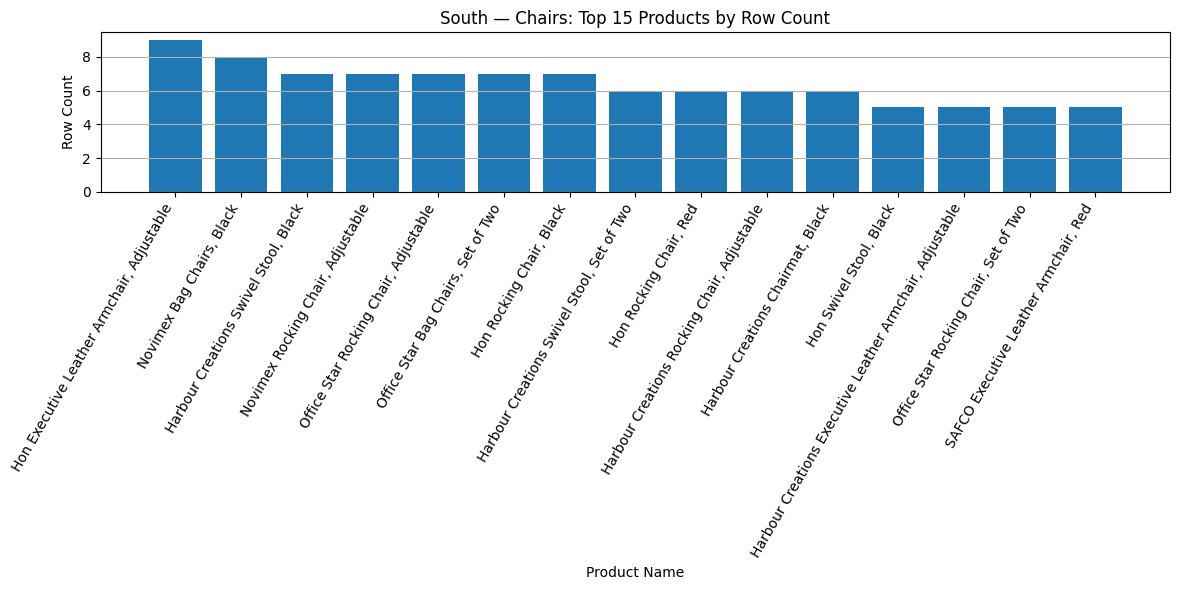

In [420]:
agg = (
    df_chairs_south.groupby("product_name", dropna=False)
                   .agg(
                       row_count=("product_name", "size"),
                       total_sales=("sales", "sum"),
                       total_profit=("profit", "sum"),
                       total_quantity=("quantity", "sum")
                   )
                   .reset_index()
)

# Sort by row_count and take top 15
topN = 15
agg_top = agg.sort_values("row_count", ascending=False).head(topN)

# Show table for reference
print("South — Chairs: Top products by row count", agg_top)

# Bar chart: Top 15 by row count
plt.figure(figsize=(12, 6))
plt.bar(agg_top["product_name"].astype(str), agg_top["row_count"].values)
plt.title("South — Chairs: Top 15 Products by Row Count")
plt.xlabel("Product Name")
plt.ylabel("Row Count")
plt.xticks(rotation=60, ha="right")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

    is_adjustable  row_count
0  Non-Adjustable        328
1      Adjustable        103


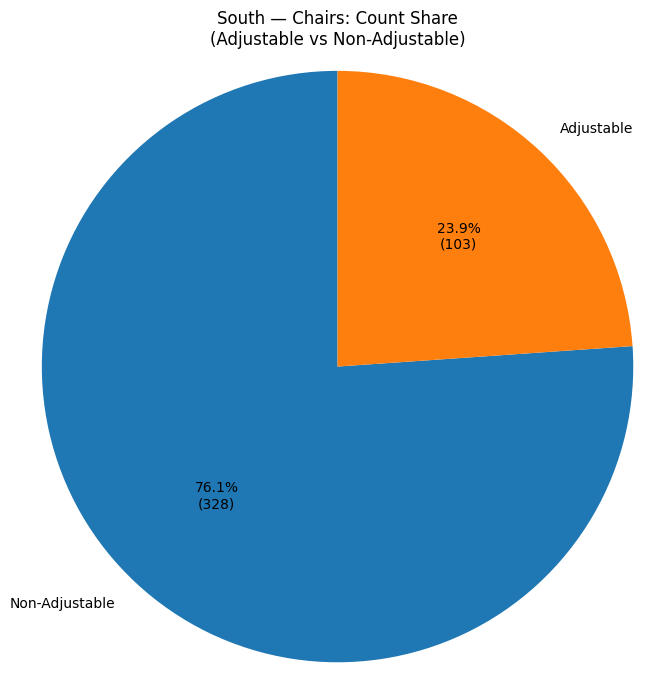

South — Chairs: Adjustable vs Non-Adjustable (total quantity)     is_adjustable  total_quantity
0  Non-Adjustable            1273
1      Adjustable             411


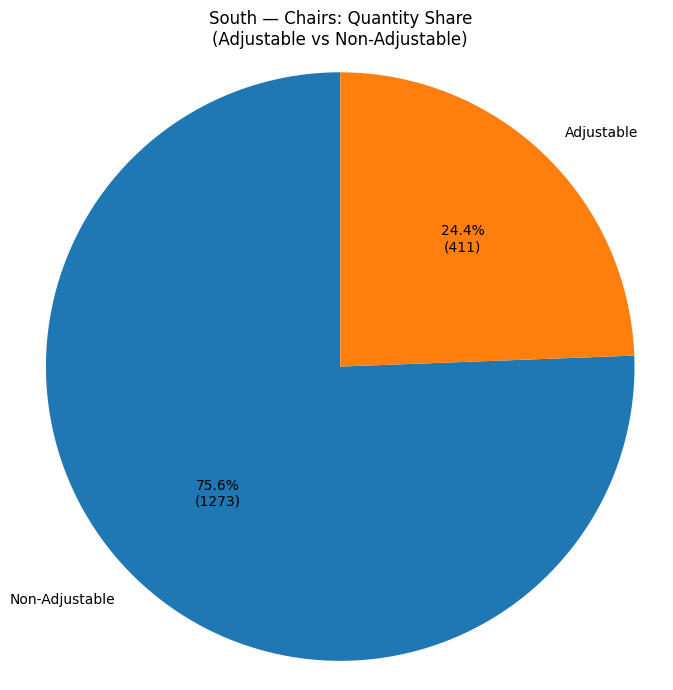

In [421]:

def is_adjustable(name: str) -> bool:
    s = str(name).lower()
    return bool(re.search(r"\badjustable\b", s))

df_chairs_south["is_adjustable"] = df_chairs_south["product_name"].map(is_adjustable)

count_table = (
    df_chairs_south.groupby("is_adjustable")
                   .size()
                   .rename("row_count")
                   .reset_index()
                   .replace({True: "Adjustable", False: "Non-Adjustable"})
)

print(count_table)

vals = count_table["row_count"].values
labels = count_table["is_adjustable"].astype(str).values

total_sum = float(vals.sum()) if np.isfinite(vals.sum()) else 0.0
def autopct_fmt(pct):
    absolute = pct/100.0 * total_sum
    return f"{pct:.1f}%\n({int(round(absolute))})"

plt.figure(figsize=(7, 7))
plt.pie(vals, labels=labels, autopct=autopct_fmt, startangle=90)
plt.title("South — Chairs: Count Share\n(Adjustable vs Non-Adjustable)")
plt.axis('equal')
plt.tight_layout()
plt.show()


qty_table = (
        df_chairs_south.groupby("is_adjustable")["quantity"]
                       .sum()
                       .reset_index()
                       .replace({True: "Adjustable", False: "Non-Adjustable"})
                       .rename(columns={"quantity": "total_quantity"})
    )
print("South — Chairs: Adjustable vs Non-Adjustable (total quantity)", qty_table)

q_vals = qty_table["total_quantity"].values
q_labels = qty_table["is_adjustable"].astype(str).values

q_total = float(np.nansum(q_vals))
def autopct_qty(pct):
        absolute = pct/100.0 * q_total
        return f"{pct:.1f}%\n({int(round(absolute))})"

plt.figure(figsize=(7, 7))
plt.pie(q_vals, labels=q_labels, autopct=autopct_qty, startangle=90)
plt.title("South — Chairs: Quantity Share\n(Adjustable vs Non-Adjustable)")
plt.axis('equal')
plt.tight_layout()
plt.show()